# Hello, RAMP: a minimal example

The following notebook excerpt providaes a minimal example of the usage of RAMP.

----------

Instrument definition files in RAMP are written in Javascript Object Notation (JSON).

In [1]:
import json

with open('inst.json', 'r') as f:
    IDF_str = f.read()
    
print(IDF_str)

{
    "all" : {
        "linear" : true,
        "mod" : {
            "source": true,
            "position" : [0.0, 0.0, 0.0],
            "moderator_kernel": {
                "name": "MISIS",
                "spec_file": "Let_Base.mcstas",
                "mod_dim": [0.04, 0.09],
                "target_dim": [0.04, 0.09],
                "target_dist": 1.7,
                "E_min": 0.0,
                "E_max": 30.0
            }
        },

        "moderator_Emon" : {
            "position" : [0.0, 0.0, 0.01],
            "geom_kernel" : {
                "name" : "GPlane",
                "width" : 0.1,
                "height" : 0.1
            },
            "scat_kernel" : {
                "name" : "EMon",
                "binning" : [0.0, 0.05, 30.0],
                "restore_neutron" : true
            }
        }
    }
}


The file loaded above ('inst.json') specifies a simple instrument consisting of an ISIS style moderator (based on the LET moderator spectrum) and an energy monitor. Let's run the simulation and plot the monitor spectrum:

Energy range: 0.0 to 30.0 meV
Time range 1e-08 to 1.0 s


c:\users\gino\appdata\local\programs\python\python36-32\lib\site-packages\pyopencl\__init__.py:235: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  "to see more.", CompilerWarning)


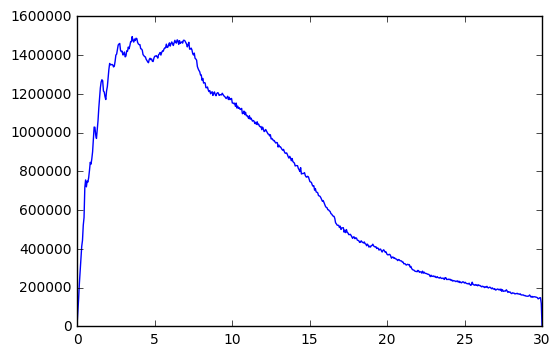

In [2]:
import mcramp as mcr
import matplotlib.pyplot as plt
import pyopencl as cl

### Some necessary OpenCL internals ###

ctx = cl.create_some_context()
queue = cl.CommandQueue(ctx)

### Create and run the Instrument simulation ###

N = 10000000

inst = mcr.Instrument('inst.json', ctx, queue)
inst.execute(N)

queue.finish()

inst.plot()